In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
from PIL import Image
import pickle as pkl

In [2]:
df = pd.read_excel('./Data/Covid_News_v3_0928.xlsx', index_col = 0)

In [3]:
with open('./Data/tokenized_doc_NV','rb') as f:
    tokenized_df = pkl.load(f)

In [4]:
topic1 = pd.read_excel('./Result_v7_명사동사/topic_result_0.xlsx', index_col=0)
topic1_num = topic1.No.tolist()
topic1_df = tokenized_df.loc[topic1_num,:]
text_list = []

for i in topic1_df.clean_doc:
    text_list.append(' '.join(i))
    
topic1_text = ' '.join(text_list)

In [5]:
import collections

In [8]:
stopwords = set(STOPWORDS)
stopwords.update([])

121


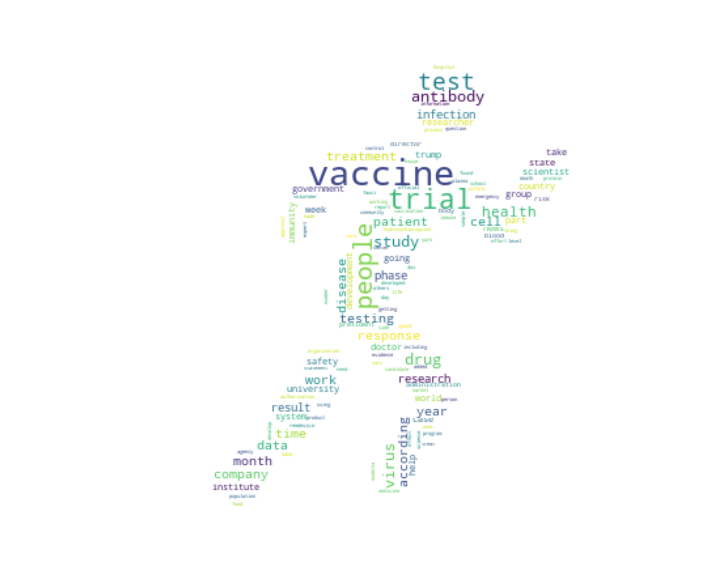

In [9]:
word_dict = collections.Counter(topic1_text.split()) # 수정
sorted(word_dict.items(), key=lambda pair: pair[1], reverse=True)

word_list = []
for key, val in word_dict.items():
    if val <= 100:
        word_list.append(key)
        
for i in word_list:
    word_dict.pop(i)
    
print(len(word_dict))

topic_mask = np.array(Image.open("./Data/jogging.jpg"))
wordcloud = WordCloud(max_font_size=40, random_state=24, stopwords=stopwords,                                                       
                      background_color='white', mask=topic_mask)

wc = wordcloud.generate_from_frequencies(word_dict)
plt.figure(figsize = (12,12))
plt.imshow(wc, interpolation = 'bilinear')
#plt.tight_layout(pad=0)
plt.axis('off')
plt.savefig('./wordcloud_result/topic11_wordcloud') #수정